In [1]:
#Importing important Library
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading the csv file
car=pd.read_csv("Car_Prediction.csv")
car

,Unnamed: 0,Brand,Model,Manufacturing Year,Driven Kilometer,Fuels,No. of Owner,Variant,Location,Price
0,0,KIA,SELTOS,2020,"5,999 km",Petrol,1st Owner,GTX+,New Delhi,"₹17,22,000"
1,1,KIA,SELTOS,2020,"9,417 km",Petrol,1st Owner,GTX,New Delhi,"₹16,81,000"
2,2,Hyundai,Grand,2019,"19,964 km",Petrol,1st Owner,MAGNA,New Delhi,"₹5,03,000"
3,3,Maruti,Alto,2011,"12,030 km",Petrol,2nd Owner,LXI,New Delhi,"₹1,74,000"
4,4,Hyundai,Grand,2019,"20,969 km",Petrol,1st Owner,MAGNA,New Delhi,"₹5,28,000"
...,...,...,...,...,...,...,...,...,...,...
5501,5501,HONDA,AMAZE,2019,"20,700 KM",PETROL,1ST OWNER,1.2L,Noida,"₹6,50,000"
5502,5502,Maruti,Suzuki,2011,"29,838 KM",PETROL,2ND OWNER,LXIManual,Noida,"₹1,69,000"
5503,5503,Maruti,Suzuki,2018,"58,200 KM",CNG,1ST OWNER,LXI,Noida,"₹4,28,000"
5504,5504,Mahindra,Thar,2022,"1,102 KM",PETROL,1ST OWNER,LX,Noida,"₹15,52,000"


In [3]:
#Dropping Unnecessary Columns
car.drop(['Unnamed: 0'],axis=1,inplace=True)

**Data Preprocessing**

In [4]:
car

,Brand,Model,Manufacturing Year,Driven Kilometer,Fuels,No. of Owner,Variant,Location,Price
0,KIA,SELTOS,2020,"5,999 km",Petrol,1st Owner,GTX+,New Delhi,"₹17,22,000"
1,KIA,SELTOS,2020,"9,417 km",Petrol,1st Owner,GTX,New Delhi,"₹16,81,000"
2,Hyundai,Grand,2019,"19,964 km",Petrol,1st Owner,MAGNA,New Delhi,"₹5,03,000"
3,Maruti,Alto,2011,"12,030 km",Petrol,2nd Owner,LXI,New Delhi,"₹1,74,000"
4,Hyundai,Grand,2019,"20,969 km",Petrol,1st Owner,MAGNA,New Delhi,"₹5,28,000"
...,...,...,...,...,...,...,...,...,...
5501,HONDA,AMAZE,2019,"20,700 KM",PETROL,1ST OWNER,1.2L,Noida,"₹6,50,000"
5502,Maruti,Suzuki,2011,"29,838 KM",PETROL,2ND OWNER,LXIManual,Noida,"₹1,69,000"
5503,Maruti,Suzuki,2018,"58,200 KM",CNG,1ST OWNER,LXI,Noida,"₹4,28,000"
5504,Mahindra,Thar,2022,"1,102 KM",PETROL,1ST OWNER,LX,Noida,"₹15,52,000"


In [5]:
#Checking the shape of the dataset
print('Shape of Data :',car.shape)

Shape of Data : (5506, 9)


In [6]:
#Checking the null values if any
car.isnull().sum()

Brand                   0
Model                   0
Manufacturing Year      0
Driven Kilometer        0
Fuels                   0
No. of Owner            0
Variant                 0
Location                0
Price                 732
dtype: int64

As we can that there are many null value present in our target column which isthe Price column we have to drop the null value to get the better accuracy of the Model

<AxesSubplot:>

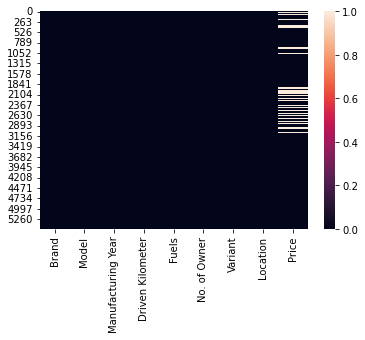

In [7]:
#plotting heatmap to show the null value present in each column.
sns.heatmap(car.isnull())

In [8]:
#Checking the nature of DType
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5506 entries, 0 to 5505
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand               5506 non-null   object
 1   Model               5506 non-null   object
 2   Manufacturing Year  5506 non-null   int64 
 3   Driven Kilometer    5506 non-null   object
 4   Fuels               5506 non-null   object
 5   No. of Owner        5506 non-null   object
 6   Variant             5506 non-null   object
 7   Location            5506 non-null   object
 8   Price               4774 non-null   object
dtypes: int64(1), object(8)
memory usage: 387.3+ KB


In [9]:
#Price is an object data we have convert it into float  value.

In [10]:
car['Price']=car['Price'].str.replace(',', '').str.replace('₹', '')

In [11]:
car['Price'].fillna(0,inplace=True)

In [12]:
car['Price']=car['Price'].astype(float)

In [13]:
#Driven Kilometer also have have some unnecessary value with it remove defaults space and KM and converting it into int value Dtype
car['Driven Kilometer']=car['Driven Kilometer'].str.replace(',', '').str.replace('KM', '')


In [14]:
car['Driven Kilometer']=car['Driven Kilometer'].str.replace(',', '').str.replace('km', '')


In [15]:
car['Driven Kilometer']=car['Driven Kilometer'].astype(int)

In [16]:
# transforming 'Price' with a log transformation to reduce the effect of extreme Value improve model accuracy
log_price = np.log(car['Price'])

# Then we add it to our data frame
car['log_Price'] = log_price
car.head()

,Brand,Model,Manufacturing Year,Driven Kilometer,Fuels,No. of Owner,Variant,Location,Price,log_Price
0,KIA,SELTOS,2020,5999,Petrol,1st Owner,GTX+,New Delhi,1722000.0,14.358997
1,KIA,SELTOS,2020,9417,Petrol,1st Owner,GTX,New Delhi,1681000.0,14.334899
2,Hyundai,Grand,2019,19964,Petrol,1st Owner,MAGNA,New Delhi,503000.0,13.128345
3,Maruti,Alto,2011,12030,Petrol,2nd Owner,LXI,New Delhi,174000.0,12.066811
4,Hyundai,Grand,2019,20969,Petrol,1st Owner,MAGNA,New Delhi,528000.0,13.176852


In [17]:
car['Driven Kilometer']

0        5999
1        9417
2       19964
3       12030
4       20969
        ...  
5501    20700
5502    29838
5503    58200
5504     1102
5505    25519
Name: Driven Kilometer, Length: 5506, dtype: int32

In [18]:
#Changing data to lower case as it will show two diffrent data.  
car['Fuels']=[x.lower() for x in car['Fuels']]
print(car['Fuels'])

0       petrol
1       petrol
2       petrol
3       petrol
4       petrol
         ...  
5501    petrol
5502    petrol
5503       cng
5504    petrol
5505    petrol
Name: Fuels, Length: 5506, dtype: object


In [19]:
#Changing data to lower case as it will show two diffrent data.  
car['No. of Owner']=[x.lower() for x in car['No. of Owner']]
print(car['No. of Owner'])

0       1st owner
1       1st owner
2       1st owner
3       2nd owner
4       1st owner
          ...    
5501    1st owner
5502    2nd owner
5503    1st owner
5504    1st owner
5505    2nd owner
Name: No. of Owner, Length: 5506, dtype: object


<AxesSubplot:>

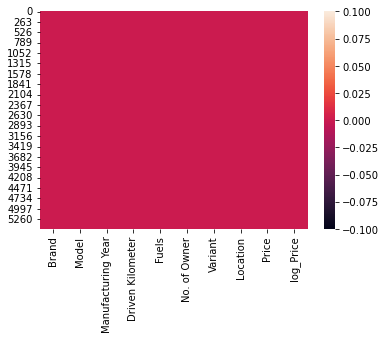

In [21]:
sns.heatmap(car.isnull())

**Feature Extraction**

In [23]:
 #Calculating  the actual Age of the car.

car["Age"]=2023-car["Manufacturing Year"]

In [24]:
car.drop(['Manufacturing Year'],axis=1,inplace=True) #Dropping the Manufacture_Year  it serves no purpose now

#    Data Exploration & Visualization

**Checking no of max unique value of  in each columns through Barplot**

In [25]:
#keeping  all the categorical variables in object_cols
s = (car.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['Brand', 'Model', 'Fuels', 'No. of Owner', 'Variant', 'Location']


<AxesSubplot:title={'center':'Number Of Unique value of the categorical Features'}>

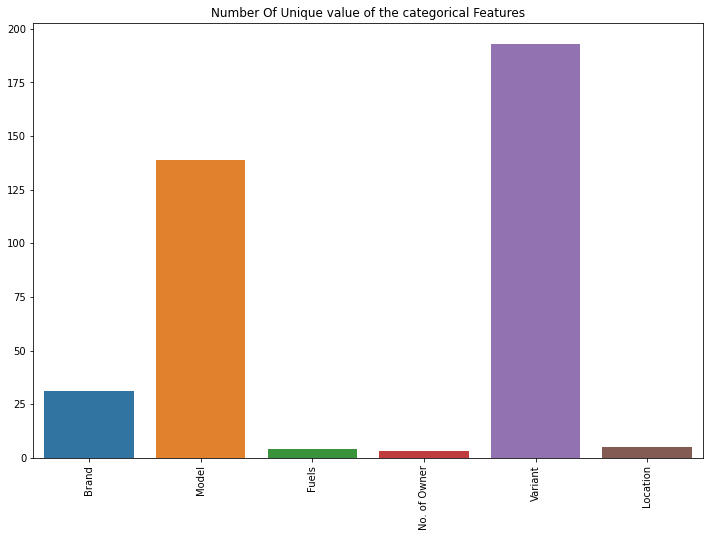

In [26]:
# Creating barplot to visualize which colum has high no. of unque value count of categorical feature.
unique_val=[]
for col in object_cols:
    unique_val.append (car[col].unique().size)
plt.figure(figsize=(12,8))
plt.title('Number Of Unique value of the categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_val)

observation :As from the above result driven Variant  has the high no of Unique value followed by Model brand has 31 unique value.

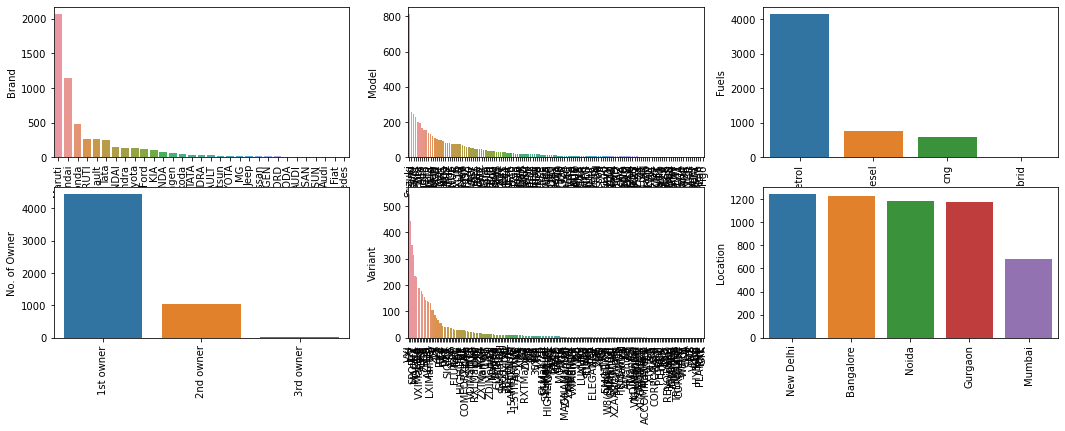

In [28]:
# Visulaizing the value counts in each of the columns. 
plt.figure(figsize=(18,36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index=1
for col in object_cols:
    y= car[col].value_counts()
    plt.subplot(11,3,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index),y=y)
    index+=1

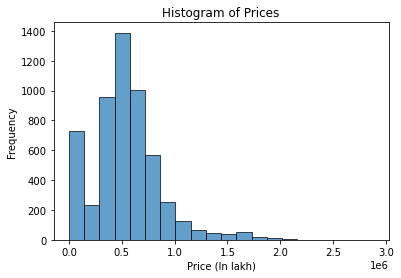

In [29]:
# Creating a histogram of the "Price" column
car["Price"].plot.hist(bins=20, edgecolor='black', alpha=0.7)

# Adding labels and titles to the plot
plt.xlabel("Price (In lakh)")
plt.ylabel("Frequency")
plt.title("Histogram of Prices")

# Showing the plot
plt.show()

observation: from above observation  we can see that frequency is high in price between 1 to 9 lakh and after that sudden decrease.

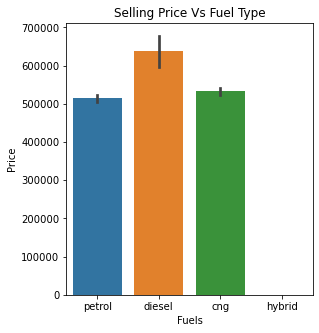

In [30]:
plt.figure(figsize=[15,5])
plt.subplot(1,3,3)
sns.barplot(car['Fuels'],car['Price'])
plt.title('Selling Price Vs Fuel Type')

plt.show()

Diesel vechile price is higher than that of petrol and CNG  hybrid is hitting the lower circuit.

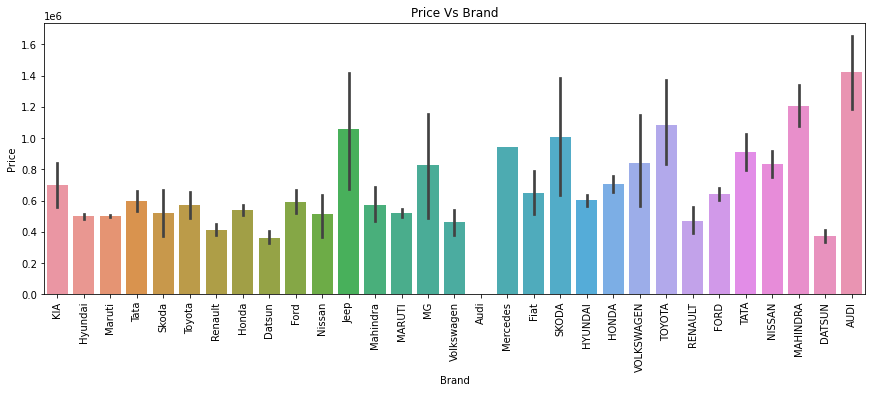

In [31]:
plt.figure(figsize=[50,5])

plt.subplot(1,3,1)
sns.barplot(car['Brand'], car['Price'])
plt.title('Price Vs Brand')
plt.xticks(rotation=90)
plt.show()

Audi has the highest Price followed by Mahindra&Jeep. As we are moving to luxury car Brands there been seen in the increase of the Price. 

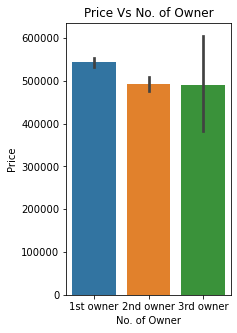

In [32]:
plt.figure(figsize=[10,5])
plt.subplot(1,3,2)
sns.barplot(car['No. of Owner'],car['Price'])
plt.title('Price Vs No. of Owner')
plt.show()

1st owner car Price is higher to that of the 2nd and 3rd owner

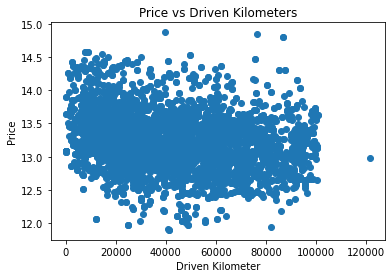

In [33]:
# Creating a scatter plot
plt.scatter(car['Driven Kilometer'],car['log_Price'])

# Adding labels and title to the plot
plt.xlabel('Driven Kilometer')
plt.ylabel('Price')
plt.title('Price vs Driven Kilometers')

# Show the plot
plt.show()

As the no of kilometers increases  Price of vechile decreasing.

<AxesSubplot:title={'center':'Price and Year'}, xlabel='Age', ylabel='log_Price'>

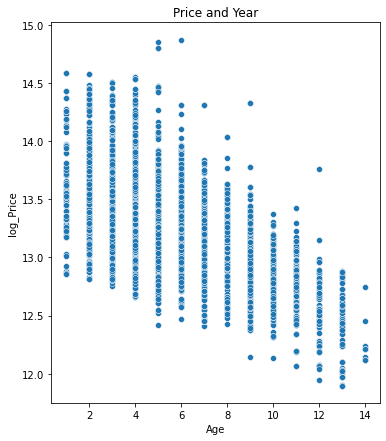

In [34]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Year")
sns.scatterplot(x='Age',y='log_Price',data=car)

Observation : Age determines the Price of the car if it increasing Price decresing.

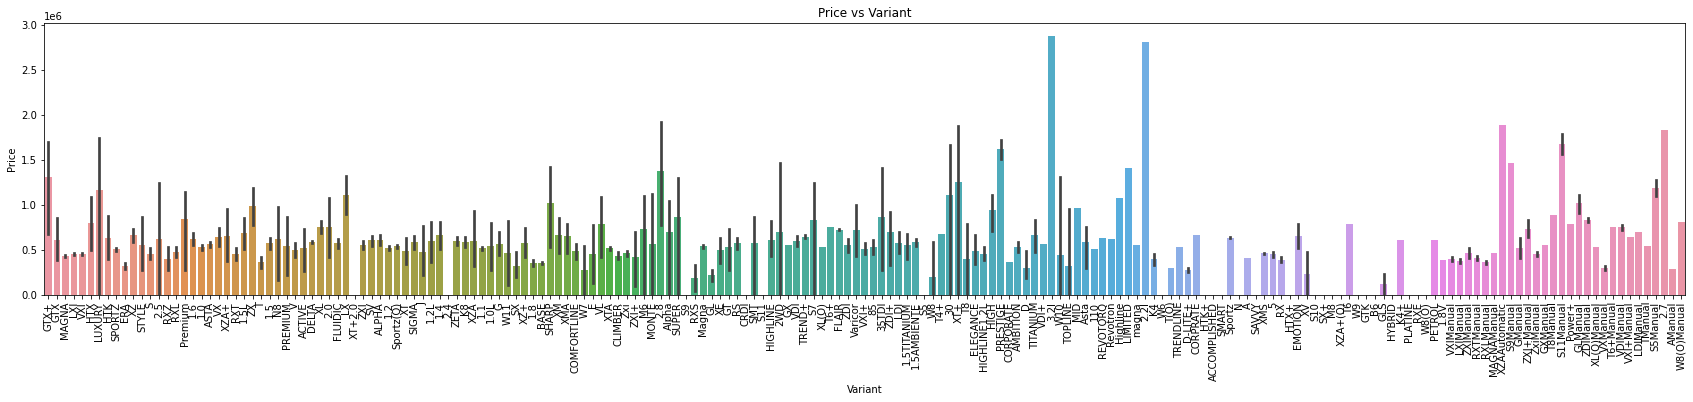

In [35]:
plt.figure(figsize=[100,5])
plt.subplot(1,3,2)
sns.barplot(car['Variant'],car['Price'])
plt.xticks(rotation=90)
plt.title('Price vs Variant')
plt.show()

obv:As we go to top variant of the car  Price is increasing

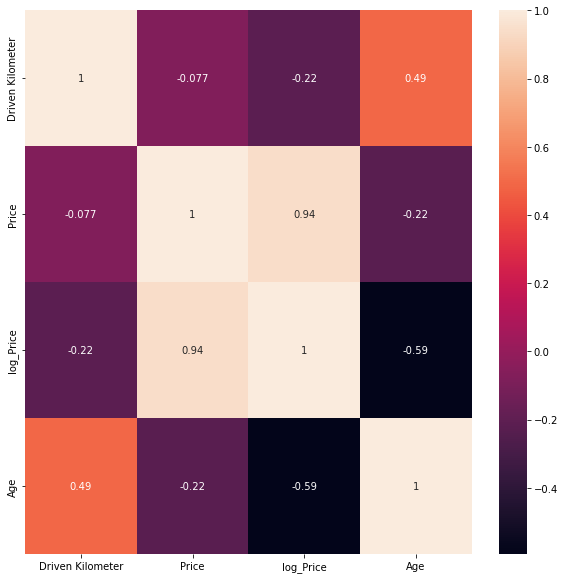

In [36]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (10,10))
sns.heatmap(car.corr(), annot = True,)

plt.show()

We consider a relation between Age and Driven kilometer

In [37]:
# Computing the number of unique models for each brand
brand_model_counts = car.groupby("Brand")["Model"].nunique()

# Creating a dictionary that maps each brand to a model category
model_categories = {
    Brand: "many_models" if count > brand_model_counts.mean() else "few_models"
    for Brand, count in brand_model_counts.items()
}

# Creating a new column that summarizes the number of models for each brand
car["brand_model_category"] = car["Brand"].map(model_categories)

# Use get_dummies to one-hot encode the brand_model_category column
car = pd.get_dummies(car, columns=["brand_model_category"])

# Droping the original model column
car = car.drop("Model", axis=1)




In [38]:
# Computing the number of unique variants for each brand
brand_variant_counts = car.groupby("Brand")["Variant"].nunique()

# Creating a dictionary that maps each brand to a variant category
variant_categories = {
    Brand: "many_variants" if count > brand_variant_counts.mean() else "few_variants"
    for Brand, count in brand_variant_counts.items()
}

# Creating a new column that summarizes the number of variants for each brand
car["brand_variant_category"] = car["Brand"].map(variant_categories)

# Using get_dummies to one-hot encode the brand_variant_category column
car = pd.get_dummies(car, columns=["brand_variant_category"])

# Droping the original variant column
car = car.drop("Variant", axis=1)


In [39]:
# Computing the average price for each brand
brand_prices = car.groupby("Brand")["Price"].mean()

# Creating a dictionary that maps each brand to a price category
price_categories = {
    Brand: "high-end" if Price > brand_prices.mean() else "budget"
    for Brand, Price in brand_prices.items()
}

# Maping the brands to their price categories
car["brand_category"] = car["Brand"].map(price_categories)

# Using get_dummies to one-hot encode the brand_category column
car= pd.get_dummies(car, columns=["brand_category"])

# Droping the original brand column
car= car.drop("Brand", axis=1)


In [40]:
car

,Driven Kilometer,Fuels,No. of Owner,Location,Price,log_Price,Age,brand_model_category_few_models,brand_model_category_many_models,brand_variant_category_few_variants,brand_variant_category_many_variants,brand_category_budget,brand_category_high-end
0,5999,petrol,1st owner,New Delhi,1722000.0,14.358997,3,1,0,0,1,0,1
1,9417,petrol,1st owner,New Delhi,1681000.0,14.334899,3,1,0,0,1,0,1
2,19964,petrol,1st owner,New Delhi,503000.0,13.128345,4,0,1,0,1,1,0
3,12030,petrol,2nd owner,New Delhi,174000.0,12.066811,12,0,1,0,1,1,0
4,20969,petrol,1st owner,New Delhi,528000.0,13.176852,4,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5501,20700,petrol,1st owner,Noida,650000.0,13.384728,4,1,0,1,0,0,1
5502,29838,petrol,2nd owner,Noida,169000.0,12.037654,12,0,1,0,1,1,0
5503,58200,cng,1st owner,Noida,428000.0,12.966878,5,0,1,0,1,1,0
5504,1102,petrol,1st owner,Noida,1552000.0,14.255055,1,0,1,0,1,1,0


In [41]:
#using Onehotencorder 
car= pd.get_dummies(car, columns=["Fuels"])

In [42]:
#using OHE
car= pd.get_dummies(car, columns=["No. of Owner"])

In [43]:
#Using OHE
car= pd.get_dummies(car, columns=["Location"])

In [44]:
car.shape #checking the shape of the data 

(5506, 22)

In [45]:
car

,Driven Kilometer,Price,log_Price,Age,brand_model_category_few_models,brand_model_category_many_models,brand_variant_category_few_variants,brand_variant_category_many_variants,brand_category_budget,brand_category_high-end,...,Fuels_hybrid,Fuels_petrol,No. of Owner_1st owner,No. of Owner_2nd owner,No. of Owner_3rd owner,Location_Bangalore,Location_Gurgaon,Location_Mumbai,Location_New Delhi,Location_Noida
0,5999,1722000.0,14.358997,3,1,0,0,1,0,1,...,0,1,1,0,0,0,0,0,1,0
1,9417,1681000.0,14.334899,3,1,0,0,1,0,1,...,0,1,1,0,0,0,0,0,1,0
2,19964,503000.0,13.128345,4,0,1,0,1,1,0,...,0,1,1,0,0,0,0,0,1,0
3,12030,174000.0,12.066811,12,0,1,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
4,20969,528000.0,13.176852,4,0,1,0,1,1,0,...,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5501,20700,650000.0,13.384728,4,1,0,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
5502,29838,169000.0,12.037654,12,0,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
5503,58200,428000.0,12.966878,5,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
5504,1102,1552000.0,14.255055,1,0,1,0,1,1,0,...,0,1,1,0,0,0,0,0,0,1


In [46]:
car.drop(['Price'],axis=1) #Dropping price and using log_price instead of it in dataframe

,Driven Kilometer,log_Price,Age,brand_model_category_few_models,brand_model_category_many_models,brand_variant_category_few_variants,brand_variant_category_many_variants,brand_category_budget,brand_category_high-end,Fuels_cng,...,Fuels_hybrid,Fuels_petrol,No. of Owner_1st owner,No. of Owner_2nd owner,No. of Owner_3rd owner,Location_Bangalore,Location_Gurgaon,Location_Mumbai,Location_New Delhi,Location_Noida
0,5999,14.358997,3,1,0,0,1,0,1,0,...,0,1,1,0,0,0,0,0,1,0
1,9417,14.334899,3,1,0,0,1,0,1,0,...,0,1,1,0,0,0,0,0,1,0
2,19964,13.128345,4,0,1,0,1,1,0,0,...,0,1,1,0,0,0,0,0,1,0
3,12030,12.066811,12,0,1,0,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4,20969,13.176852,4,0,1,0,1,1,0,0,...,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5501,20700,13.384728,4,1,0,1,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
5502,29838,12.037654,12,0,1,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
5503,58200,12.966878,5,0,1,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,1
5504,1102,14.255055,1,0,1,0,1,1,0,0,...,0,1,1,0,0,0,0,0,0,1


In [47]:
car['log_Price'].isnull().any()

False

# Model Training and Testing

In [48]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [49]:
# Checking for non-numeric values
try:
    car['log_Price'] = car['log_Price'].astype(float)
except ValueError:
    # Remove non-numeric values
    car = car[car['log_Price'].apply(lambda x: x.replace(',', '').replace('.', '').isnumeric())]
    car['log_Price'] = car['log_Price'].astype(float)

# Checking the data type
if not np.issubdtype(car['log_Price'].dtype, np.number):
    # Converting to numeric data type
    car['log_Price'] = pd.to_numeric(car['log_Price'], errors='coerce')

# Checking for outliers
Q1 = car['log_Price'].quantile(0.25)
Q3 = car['log_Price'].quantile(0.75)
IQR = Q3 - Q1
car = car[~((car['log_Price'] < (Q1 - 1.5 * IQR)) | (car['log_Price'] > (Q3 + 1.5 * IQR)))]

# Fiting the model using the cleaned data
model.fit(car.drop(columns='log_Price'), car['log_Price'])





LinearRegression()

# RandomForest Regressor Model

In [50]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Split the data into features (X) and target (y)
X = car.drop("log_Price", axis=1)
y = car["log_Price"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)


# Evaluate the model on the test data
score = reg_rf.score(X_test, y_test)
print("Test R^2 score: {:.2f}".format(score))

y_pred_rf = reg_rf.predict(X_test)
r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)
print("RMSE :",rmse)


Test R^2 score: 1.00
R_squared : 0.9999897489472591
RMSE : 0.0012940085977529805


# LinearRegression Model

In [51]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print("Test R^2 score: {:.2f}".format(score))

Test R^2 score: 0.93


In [52]:


# Model Summary
y_pred_model = model.predict(X_test)

r_squared = r2_score(y_test,y_pred_model)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_model))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.9293233277857043
RMSE : 0.10744617864840313


# GBT Regressor Model

In [53]:
# Model Building
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(X_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(X_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.999889224742368
RMSE : 0.004253773019559795


# Hyperparameter Tuning

In [54]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [55]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [56]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [57]:
predictions=rf_random.predict(X_test)

In [58]:
r_squared = r2_score(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("R_squared :",r_squared)

R_squared : 0.9999554600383493


In [59]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

MAE: 0.00040539306881191107
MSE: 1.674458251058635e-06
RMSE: 0.0012940085977529805


In [60]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred_rf), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev.tail(5)

,Predicted Price,Actual Price,Residual,Difference%
1418,394009.94,394000.00,-9.94,0.00
1419,417029.89,417000.00,-29.89,0.01
1420,718813.37,719000.00,186.63,0.03
1421,807199.68,807000.00,-199.68,0.02
1422,614099.85,614000.00,-99.85,0.02


Models looks good and have ability to give the result at 99.99% accuracy.